<a href="https://colab.research.google.com/github/enVives/TFG/blob/main/ImageComparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import os
import cv2

from glob import glob
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import drive


DRIVE_PATH = "/content/drive/MyDrive/Features/Dist/"
EXECUCIO = 1

drive.mount('/content/drive')
metadates = pd.read_csv('/content/drive/MyDrive/Features/Dist/'+str(EXECUCIO)+"/distances.txt", sep=";")
print(metadates.head())

PATH = DRIVE_PATH +str(EXECUCIO)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       test_img test_img_pred_label test_img_label  \
0  ISIC_0031042                  nv             nv   
1  ISIC_0025046                 bcc            bcc   
2  ISIC_0032554                  nv             nv   
3  ISIC_0033146                 bcc            bcc   
4  ISIC_0028808                  nv             nv   

                                       top_distances  \
0  [0.9972038249220433, 0.9971748889215803, 0.997...   
1  [0.996872768412303, 0.9968683330084407, 0.9967...   
2  [0.9976671397219957, 0.9971209773058182, 0.997...   
3  [0.9968137593652359, 0.9967108865164148, 0.996...   
4  [0.9972634748752823, 0.9970029795742187, 0.996...   

               top_images_labels  \
0     ['nv' 'nv' 'nv' 'nv' 'nv']   
1  ['bkl' 'bkl' 'bkl' 'nv' 'nv']   
2    ['nv' 'nv' 'bkl' 'nv' 'nv']   
3  ['akiec' 'nv' 'nv' 'nv' 'nv']   
4     ['nv' 'nv' 'nv' 'nv' 'n

['/content/drive/MyDrive/Features/Dist/1/ISIC_0024597(nv)/Top/0_nv.jpg', '/content/drive/MyDrive/Features/Dist/1/ISIC_0024597(nv)/Top/1_vasc.jpg', '/content/drive/MyDrive/Features/Dist/1/ISIC_0024597(nv)/Top/2_nv.jpg', '/content/drive/MyDrive/Features/Dist/1/ISIC_0024597(nv)/Top/3_nv.jpg', '/content/drive/MyDrive/Features/Dist/1/ISIC_0024597(nv)/Top/4_vasc.jpg']


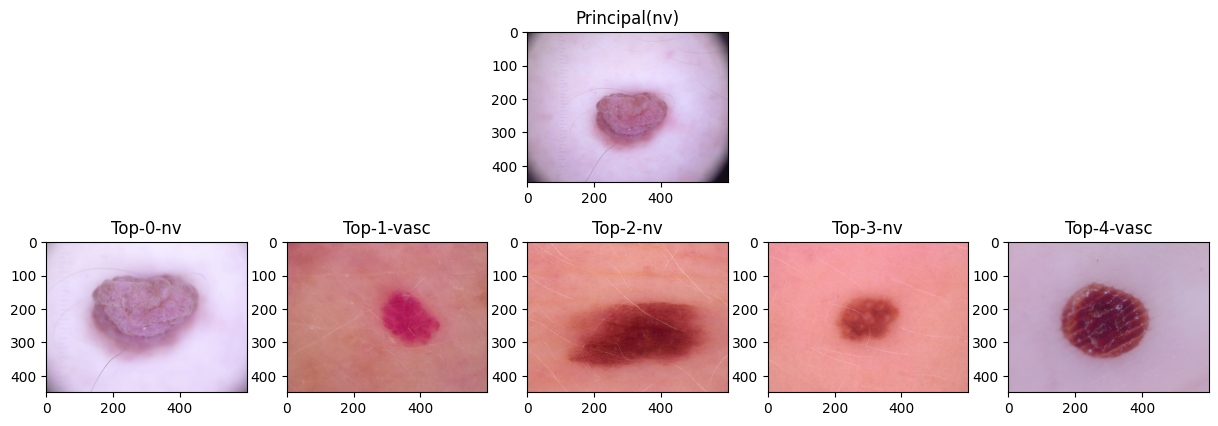

In [30]:
testing_images_folders = sorted(glob(PATH+'/*'))
testing_images_names = np.array([])

for i in range(len(testing_images_folders)-2):
  testing_images_names = np.append(testing_images_names,(testing_images_folders[i].split("/")[-1]).split("(")[0])

#iteram cada carpeta de cada imatge
for j in range(len(testing_images_folders)-2):
  imatge_test = cv2.imread(glob(str(testing_images_folders[j])+"/*.jpg")[0])
  carpeta_top = testing_images_folders[j]+"/Top/"
  carpeta_bottom = testing_images_folders[j]+"/Bottom/"

  imatges_top = sorted(glob(carpeta_top+"/*.jpg"))

  fig, axes = plt.subplots(2, 5, figsize=(15, 5))

  fig.delaxes(axes[0, 0]) #eliminar plots
  fig.delaxes(axes[0, 1])
  fig.delaxes(axes[0, 3])
  fig.delaxes(axes[0, 4])

  imatge_test = cv2.cvtColor(imatge_test, cv2.COLOR_BGR2RGB)
  axes[0][2].imshow(imatge_test) #mostrar-los
  axes[0][2].set_title("Principal("+glob(str(testing_images_folders[j])+"/*.jpg")[0].split('/')[-1].split('_')[0]+")")

  print(imatges_top)
  for k in range(len(imatges_top)):
    img = cv2.imread(imatges_top[k])
    img_class = imatges_top[k].split('/')[-1].split('.')[0].split('_')[1]
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convertir de BGR a RGB
    axes[1][k].imshow(img)
    axes[1][k].set_title("Top-"+str(k)+"-"+str(img_class))

  plt.savefig(testing_images_folders[k]+"/comparacio_imatges_top.jpg", dpi=300, bbox_inches="tight")

  imatges_bottom = sorted(glob(carpeta_bottom+"/*.jpg"))
  break
